In [1]:
import osmnx as ox

lustenau = ["Lustenau, Austria"]
lustenau_graph = ox.graph_from_place(lustenau, network_type='drive', simplify=True)

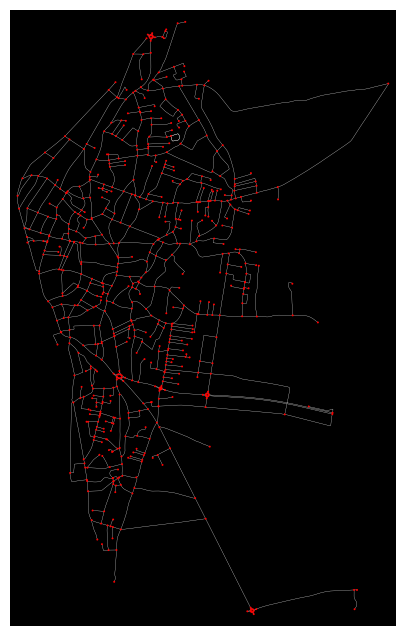

In [2]:
fig, ax = ox.plot_graph(lustenau_graph.to_undirected(), node_size=2, bgcolor='k', node_color='r', edge_color='w', edge_linewidth=0.2)

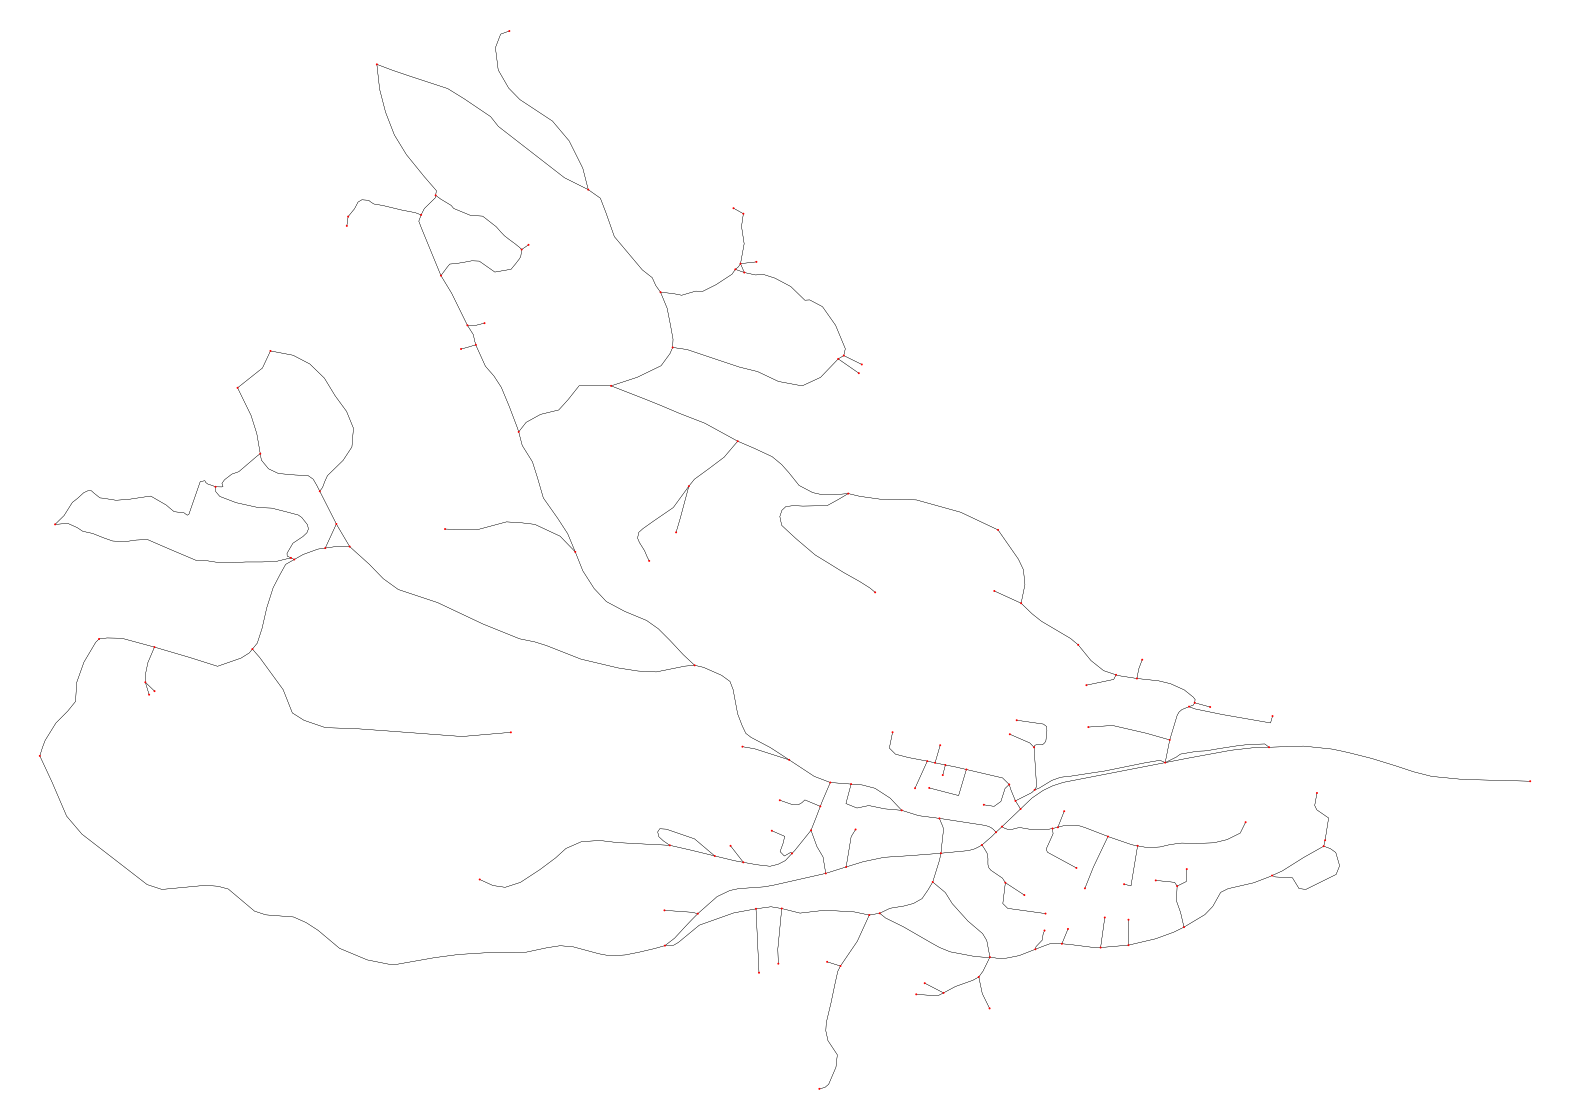

In [3]:
import osmnx as ox
fig, ax = ox.plot_graph(ox.graph_from_place(['Röns, Austria'], network_type='walk', simplify=True), bgcolor='#00000000', edge_color='k', node_color='r', node_size=2, edge_linewidth=0.2, edge_alpha=1, figsize=(20,20), dpi=300, save=True, filepath='image-simply-walk-röns.png')

In [4]:
len(ox.graph_from_place(lustenau, network_type='drive', simplify=True).edges)

1659

In [5]:
len(ox.graph_from_place(lustenau, network_type='drive', simplify=False).edges)

11112

In [6]:
G = lustenau_graph.to_undirected()
lustenau_nodes_df, lustenau_edges_df = ox.graph_to_gdfs(G)
lustenau_edges_df[lustenau_edges_df['name'] == "Quellenstraße"]

,,,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,bridge,geometry,junction,width,tunnel
u,v,key,,,,,,,,,,,,,,
323293851,323322071,0,29392482,False,NaN,NaN,Quellenstraße,residential,40,False,88.384,NaN,"LINESTRING (9.65056 47.43407, 9.65084 47.43399...",NaN,NaN,NaN
323315860,323326743,0,1215843804,False,NaN,NaN,Quellenstraße,residential,40,True,114.758,NaN,"LINESTRING (9.64777 47.43483, 9.64918 47.43444)",NaN,NaN,NaN
323322065,323322071,0,29392481,False,NaN,NaN,Quellenstraße,residential,40,True,184.664,NaN,"LINESTRING (9.65056 47.43407, 9.65031 47.43380...",NaN,NaN,NaN
323322071,323326743,0,29392482,False,NaN,NaN,Quellenstraße,residential,40,False,111.983,NaN,"LINESTRING (9.64918 47.43444, 9.65023 47.43416...",NaN,NaN,NaN


In [7]:
lustenau_edges_df.compare(ox.graph_to_gdfs(lustenau_graph, nodes=False))

ValueError: Can only compare identically-labeled DataFrame objects

In [8]:
G_proj = ox.project_graph(lustenau_graph)

In [9]:
ox.basic_stats(G_proj)

{'n': 687,
 'm': 1659,
 'k_avg': 4.829694323144105,
 'edge_length_total': 221439.1250000001,
 'edge_length_avg': 133.4774713682942,
 'streets_per_node_avg': 2.5705967976710333,
 'streets_per_node_counts': {0: 0, 1: 165, 2: 3, 3: 481, 4: 38},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24017467248908297,
  2: 0.004366812227074236,
  3: 0.7001455604075691,
  4: 0.055312954876273655},
 'intersection_count': 522,
 'street_length_total': 113246.18800000005,
 'street_segment_count': 877,
 'street_length_avg': 129.12906271379708,
 'circuity_avg': 1.0418375982593893,
 'self_loop_proportion': 0.0011402508551881414}

In [10]:
def f(frame):
    xy = frame.geometry.xy
    longs = xy[0].tolist()
    lats = xy[1].tolist()
    return [list(z) for z in zip(lats, longs)]

lustenau_edges_df['coords'] = lustenau_edges_df.apply(f, axis=1)
len(lustenau_edges_df['coords'])

877

In [11]:
coords_x = []
coords_y = []

for temp_coord in lustenau_edges_df['coords']:
    for coord in temp_coord:
        coords_x.append(coord[0])
        coords_y.append(coord[1])
        
coords_x

[47.4462899,
 47.4460768,
 47.4459536,
 47.4458289,
 47.445777,
 47.4457527,
 47.4457415,
 47.4457218,
 47.4456634,
 47.4456309,
 47.4456148,
 47.4455883,
 47.4454345,
 47.4452251,
 47.4451563,
 47.445067,
 47.4450015,
 47.4449354,
 47.4448262,
 47.4447323,
 47.4447223,
 47.4447422,
 47.4447495,
 47.4447277,
 47.4446933,
 47.4446443,
 47.4445808,
 47.4445699,
 47.4445608,
 47.4445176,
 47.444024,
 47.4439493,
 47.4437908,
 47.4437365,
 47.44373,
 47.4437321,
 47.4437419,
 47.4437654,
 47.4437971,
 47.4438529,
 47.4451902,
 47.4454266,
 47.4455865,
 47.445623,
 47.4457444,
 47.4458436,
 47.4459023,
 47.4459588,
 47.446025,
 47.4460757,
 47.4461269,
 47.4465493,
 47.4465179,
 47.4464439,
 47.4463555,
 47.4462604,
 47.4461269,
 47.44618,
 47.4461827,
 47.4461841,
 47.4461624,
 47.4461479,
 47.4461269,
 47.4406289,
 47.4408316,
 47.4409469,
 47.4410891,
 47.4411041,
 47.4412078,
 47.4413494,
 47.4414735,
 47.4417409,
 47.4419067,
 47.4422785,
 47.4423043,
 47.4424589,
 47.4427027,
 47.4428

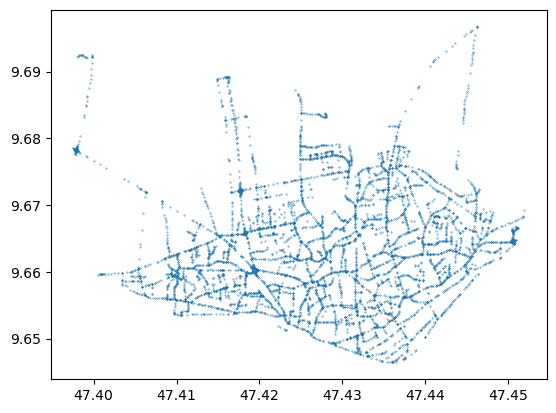

In [12]:
from matplotlib import pyplot as plt

plt.scatter(x=coords_x, y=coords_y, s=0.1)
plt.show()

In [13]:
len(coords_x)

6526

In [14]:
import networkx as nx
from itertools import combinations

# Step 2: Convert to an Edge Graph
edge_graph = nx.Graph()
for u, v, data in lustenau_graph.edges(data=True):
    edge_graph.add_node((u, v))  # Each edge is a node
    
for node1, node2 in combinations(edge_graph.nodes, 2):
    # Add edges between nodes that have a common endpoint in the original graph
    if node1[1] == node2[0] or node1[0] == node2[1] or node1[1] == node2[1] or node1[0] == node2[0]:
        edge_graph.add_edge(node1, node2)

In [15]:
tsp_path = nx.approximation.traveling_salesman_problem(edge_graph, cycle=True)

In [20]:
first = tsp_path[0]
first

(2113259, 323329860)

In [21]:
lustenau_graph.nodes[first[0]]

{'y': 47.4461269, 'x': 9.671793, 'street_count': 4}

In [22]:
lustenau_graph.nodes[first[1]]

{'y': 47.4462899, 'x': 9.6967666, 'street_count': 3}

In [33]:
import gpxpy

waypoints = []

for node in tsp_path:
    first = node[0]
    second = node[1]
    waypoints.append(gpxpy.gpx.GPXWaypoint(latitude=lustenau_graph.nodes[first]['x'], longitude=lustenau_graph.nodes[first]['y'], name=""))
    waypoints.append(gpxpy.gpx.GPXWaypoint(latitude=lustenau_graph.nodes[second]['x'], longitude=lustenau_graph.nodes[second]['y'], name=""))
    
waypoints

[GPXWaypoint(9.671793, 47.4461269, name=''),
 GPXWaypoint(9.6967666, 47.4462899, name=''),
 GPXWaypoint(9.6723626, 47.4465493, name=''),
 GPXWaypoint(9.671793, 47.4461269, name=''),
 GPXWaypoint(9.6967666, 47.4462899, name=''),
 GPXWaypoint(9.671793, 47.4461269, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6967666, 47.4462899, name=''),
 GPXWaypoint(9.6967666, 47.4462899, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6818031, 47.4356428, name=''),
 GPXWaypoint(9.6789064, 47.436255, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6818031, 47.4356428, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6817583, 47.4367789, name=''),
 GPXWaypoint(9.6789064, 47.436255, name=''),
 GPXWaypoint(9.678877, 47.4368997, name=''),
 GPXWaypoint(9.6789064, 47.436255, name=''),
 GPXWaypoint(9.6789064, 47.436255, name=''),
 GPXWaypoint(9.678877, 47.4368997, name=''

In [40]:
import gpxpy
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)

# Create first segment in our GPX track:
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)

for waypoint in waypoints:
    gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(waypoint.longitude, waypoint.latitude))

print('Created GPX:', gpx.to_xml())

Created GPX: <?xml version="1.0" encoding="UTF-8"?>
<gpx xmlns="http://www.topografix.com/GPX/1/1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd" version="1.1" creator="gpx.py -- https://github.com/tkrajina/gpxpy">
  <trk>
    <trkseg>
      <trkpt lat="47.4461269" lon="9.671793">
      </trkpt>
      <trkpt lat="47.4462899" lon="9.6967666">
      </trkpt>
      <trkpt lat="47.4465493" lon="9.6723626">
      </trkpt>
      <trkpt lat="47.4461269" lon="9.671793">
      </trkpt>
      <trkpt lat="47.4462899" lon="9.6967666">
      </trkpt>
      <trkpt lat="47.4461269" lon="9.671793">
      </trkpt>
      <trkpt lat="47.4367789" lon="9.6817583">
      </trkpt>
      <trkpt lat="47.4462899" lon="9.6967666">
      </trkpt>
      <trkpt lat="47.4462899" lon="9.6967666">
      </trkpt>
      <trkpt lat="47.4367789" lon="9.6817583">
      </trkpt>
      <trkpt lat="47.4367789" lon="9.681758